In [5]:
import time
import numpy as np
import bezier
from enum import IntEnum
import math
import matplotlib.pyplot as plt

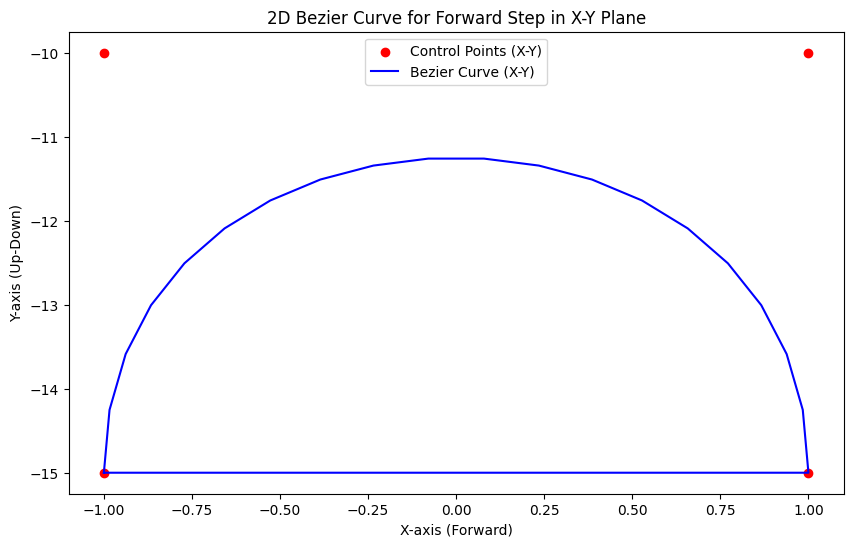

In [20]:
step_nodes = np.asfortranarray([
    [-1.0, -1.0, 1.0, 1.0],
    [0.0, 0.0, 0.0, 0.0],
    [-15.0, -10.0, -10.0, -15.0]
])

# 創建一條三階貝茲曲線
curve = bezier.Curve(step_nodes, degree=3)

# 計算貝茲曲線上的點（公式定義範圍必須為 0 到 1，細分成 20 個點來繪製平滑曲線）
s_vals = np.linspace(0.0, 1.0, 20)
step = curve.evaluate_multi(s_vals)

slide_nodes = np.asfortranarray([
            [1.0, -1.0],
            [1.0, -1.0],
            [-15.0, -15],
        ])
curve = bezier.Curve(slide_nodes, degree=1)
slide = curve.evaluate_multi(s_vals)

motion = np.concatenate((step,slide), axis=1)

# 創建 Matplotlib 圖像
fig = plt.figure(figsize=(10, 6))

# 繪製 2D 圖像，僅在 X-Y 平面上
ax2d = fig.add_subplot(111)
# 繪製控制點
ax2d.scatter(step_nodes[0], step_nodes[2], color='red', label='Control Points (X-Y)')
# 繪製貝茲曲線
ax2d.plot(motion[0], motion[2], color='blue', label='Bezier Curve (X-Y)')

# 設置標籤和圖例
ax2d.set_xlabel("X-axis (Forward)")
ax2d.set_ylabel("Y-axis (Up-Down)")
ax2d.legend()
ax2d.set_title("2D Bezier Curve for Forward Step in X-Y Plane")

# 顯示圖像
plt.show()

theta_shoulder =  150.00000000000003
theta_elbow =  29.999999999999993


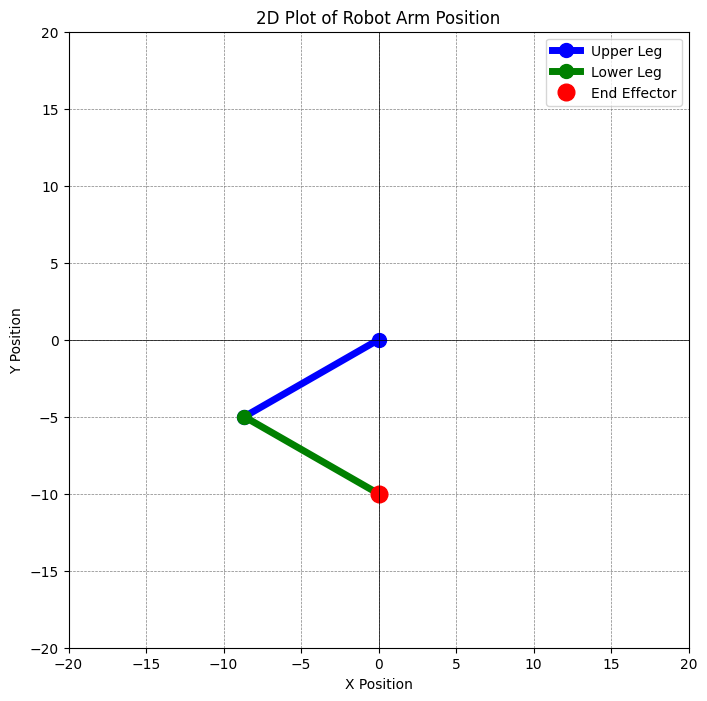

In [ ]:
L=0
x, z, y = 0, 0, -10
upper_leg_length = 10
lower_leg_length = 10
y_prime = -math.sqrt((z+L)**2 + y**2)
thetaz = math.atan2(z+L,abs(y))-math.atan2(L,abs(y_prime))

a1 = upper_leg_length
a2 = lower_leg_length

c2 = (x**2+y_prime**2-a1**2-a2**2)/(2*a1*a2)
s2 = math.sqrt(1-c2**2)
theta2 = math.atan2(s2,c2)
c2 = math.cos(theta2)
s2 = math.sin(theta2)

c1 = (x*(a1+(a2*c2)) + y_prime*(a2*s2))/(x**2+y_prime**2)
s1 = (y_prime*(a1+(a2*c2)) - x*(a2*s2))/(x**2+y_prime**2)
theta1 = math.atan2(s1,c1)
# generate positions with respect to robot motors
theta_shoulder = -theta1
theta_elbow = theta_shoulder - theta2

print("theta_shoulder = ", theta_shoulder*180/math.pi)
print("theta_elbow = ", theta_elbow*180/math.pi)

shoulder_x, shoulder_y = 0, 0
elbow_x = shoulder_x + a1 * math.cos(-theta_shoulder)
elbow_y = shoulder_y + a1 * math.sin(-theta_shoulder)
end_effector_x = elbow_x + a2 * math.cos(-theta_elbow)
end_effector_y = elbow_y + a2 * math.sin(-theta_elbow)

plt.figure(figsize=(8, 8))
plt.plot([shoulder_x, elbow_x], [shoulder_y, elbow_y], 'b-o', linewidth=5, markersize=10, label="Upper Leg")  # 上段臂
plt.plot([elbow_x, end_effector_x], [elbow_y, end_effector_y], 'g-o', linewidth=5, markersize=10, label="Lower Leg")  # 下段臂
plt.plot(end_effector_x, end_effector_y, 'ro', markersize=12, label="End Effector")  # 終端點

# 設置圖表參數
plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("2D Plot of Robot Arm Position")
plt.legend()
plt.show()

index:  0  (  -4.0 -15.0  )
0.22500000000000014
theta_shoulder =  143.30477568709819
theta_elbow =  66.30765385001212
index:  1  (  -3.9358507071001614 -14.252077562326875  )
0.11306317815580982
theta_shoulder =  147.0492986605375
theta_elbow =  63.54122336621924
index:  2  (  -3.752733634640619 -13.58725761772853  )
0.013482896515424727
theta_shoulder =  149.89676033022553
theta_elbow =  60.66929680375097
index:  3  (  -3.464644991981338 -13.005540166204986  )
-0.07426080032383708
theta_shoulder =  151.88068472110103
theta_elbow =  57.621933880815604
index:  4  (  -3.0855809884822865 -12.506925207756233  )
-0.1502800590555421
theta_shoulder =  153.0129747915825
theta_elbow =  54.369818057722014
index:  5  (  -2.6295378335034267 -12.091412742382273  )
-0.21441634337764853
theta_shoulder =  153.30022061821361
theta_elbow =  50.91893290220574
index:  6  (  -2.1105117364047237 -11.759002770083104  )
-0.26635797031837893
theta_shoulder =  152.75786217467416
theta_elbow =  47.31020293688731

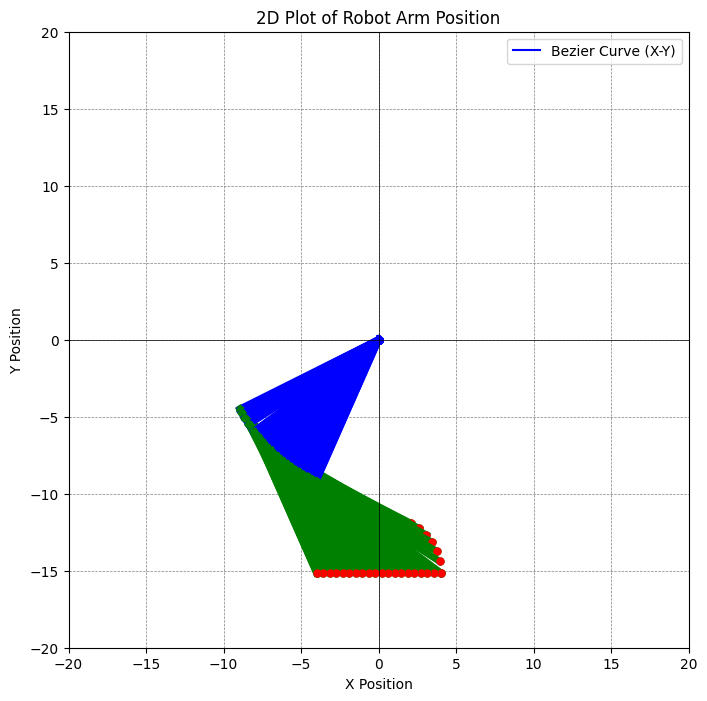

In [54]:
plt.figure(figsize=(8, 8))
plt.plot(motion[0], motion[2], color='blue', label='Bezier Curve (X-Y)')

momentum = np.asarray([4,0,1,0],dtype=np.float32)

for index in range(40):
    L=2
    tragectory = motion * momentum[:3, None]
    x_all,z_all,y_all = tragectory
    x = x_all[index]
    y = y_all[index]
    z = z_all[index]
    print("index: ", index, " ( ", x, y, " )")
    upper_leg_length = 10
    lower_leg_length = 10
    y_prime = -math.sqrt((z+L)**2 + y**2)
    thetaz = math.atan2(z+L,abs(y))-math.atan2(L,abs(y_prime))

    elbow_offset = 20
    shoulder_offset = 10
    a1 = upper_leg_length
    a2 = lower_leg_length

    c2 = (x**2+y_prime**2-a1**2-a2**2)/(2*a1*a2)
    print(c2)
    s2 = math.sqrt(1-c2**2)
    theta2 = math.atan2(s2,c2)
    c2 = math.cos(theta2)
    s2 = math.sin(theta2)

    c1 = (x*(a1+(a2*c2)) + y_prime*(a2*s2))/(x**2+y_prime**2)
    s1 = (y_prime*(a1+(a2*c2)) - x*(a2*s2))/(x**2+y_prime**2)
    theta1 = math.atan2(s1,c1)
    # generate positions with respect to robot motors
    theta_shoulder = -theta1
    theta_elbow = theta_shoulder - theta2

    print("theta_shoulder = ", theta_shoulder*180/math.pi)
    print("theta_elbow = ", theta_elbow*180/math.pi)

    shoulder_x, shoulder_y = 0, 0
    elbow_x = shoulder_x + a1 * math.cos(-theta_shoulder)
    elbow_y = shoulder_y + a1 * math.sin(-theta_shoulder)
    end_effector_x = elbow_x + a2 * math.cos(-theta_elbow)
    end_effector_y = elbow_y + a2 * math.sin(-theta_elbow)

    plt.plot([shoulder_x, elbow_x], [shoulder_y, elbow_y], 'b-o', linewidth=5, markersize=5)  # 上段臂
    plt.plot([elbow_x, end_effector_x], [elbow_y, end_effector_y], 'g-o', linewidth=5, markersize=5)  # 下段臂
    plt.plot(end_effector_x, end_effector_y, 'ro', markersize=5)  # 終端點

# 設置圖表參數
plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("2D Plot of Robot Arm Position")
plt.legend()
plt.show()

In [ ]:
motion

array([[ -1.        ,  -0.98396268,  -0.93818341,  -0.86616125,
         -0.77139525,  -0.65738446,  -0.52762793,  -0.38562473,
         -0.23487389,  -0.07887447,   0.07887447,   0.23487389,
          0.38562473,   0.52762793,   0.65738446,   0.77139525,
          0.86616125,   0.93818341,   0.98396268,   1.        ,
          1.        ,   0.89473684,   0.78947368,   0.68421053,
          0.57894737,   0.47368421,   0.36842105,   0.26315789,
          0.15789474,   0.05263158,  -0.05263158,  -0.15789474,
         -0.26315789,  -0.36842105,  -0.47368421,  -0.57894737,
         -0.68421053,  -0.78947368,  -0.89473684,  -1.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          1.        ,   0.89473684,   0